In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_ceny = pd.read_csv("SQL project.csv")
print(data_ceny)

                       name        Cena  Hodnota Jednotka   Rok        Mzda
0              Banány žluté   27.304640      1.0       kg  2006  20342.3816
1              Banány žluté   30.848056      1.0       kg  2007  21724.6053
2              Banány žluté   30.586391      1.0       kg  2008  23475.1711
3              Banány žluté   30.562139      1.0       kg  2009  24238.1711
4              Banány žluté   27.443303      1.0       kg  2010  24722.1974
..                      ...         ...      ...      ...   ...         ...
337  Vepřová pečeně s kostí  116.374667      1.0       kg  2014  26323.5526
338  Vepřová pečeně s kostí  108.662444      1.0       kg  2015  26959.7237
339  Vepřová pečeně s kostí  109.462889      1.0       kg  2016  27946.9211
340  Vepřová pečeně s kostí  118.274778      1.0       kg  2017  29735.7763
341  Vepřová pečeně s kostí  116.853222      1.0       kg  2018  31980.2632

[342 rows x 6 columns]


In [3]:
# seznam všech potravin
potraviny = list(data_ceny["name"].unique())
potraviny_series = pd.Series(potraviny)
potraviny_series.index += 1
print(potraviny_series)

1                         Banány žluté
2                      Cukr krystalový
3                       Eidamská cihla
4          Hovězí maso zadní bez kosti
5               Chléb konzumní kmínový
6                      Jablka konzumní
7                   Jakostní víno bílé
8                  Jogurt bílý netučný
9                            Kapr živý
10                   Konzumní brambory
11                 Kuřata kuchaná celá
12                               Máslo
13         Mléko polotučné pasterované
14                               Mrkev
15                             Papriky
16                Pečivo pšeničné bílé
17       Pivo výčepní, světlé, lahvové
18                           Pomeranče
19    Přírodní minerální voda uhličitá
20               Pšeničná mouka hladká
21        Rajská jablka červená kulatá
22          Rostlinný roztíratelný tuk
23            Rýže loupaná dlouhozrnná
24                       Šunkový salám
25                   Těstoviny vaječné
26               Vejce sl

     Rok        Mzda     Narust  Narust - procenta
1   2006  20342.3816     0.0000           0.000000
2   2007  21724.6053  1382.2237           6.794798
3   2008  23475.1711  1750.5658           8.057987
4   2009  24238.1711   763.0000           3.250243
5   2010  24722.1974   484.0263           1.996959
6   2011  25284.3816   562.1842           2.274006
7   2012  26077.1184   792.7368           3.135283
8   2013  25670.8421  -406.2763          -1.557980
9   2014  26323.5526   652.7105           2.542614
10  2015  26959.7237   636.1711           2.416737
11  2016  27946.9211   987.1974           3.661749
12  2017  29735.7763  1788.8552           6.400903
13  2018  31980.2632  2244.4869           7.548103


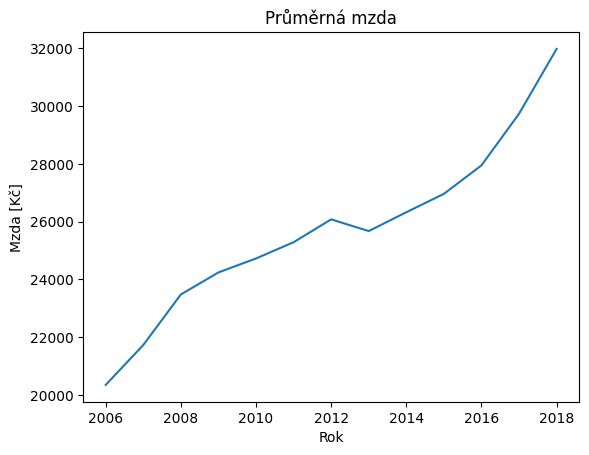

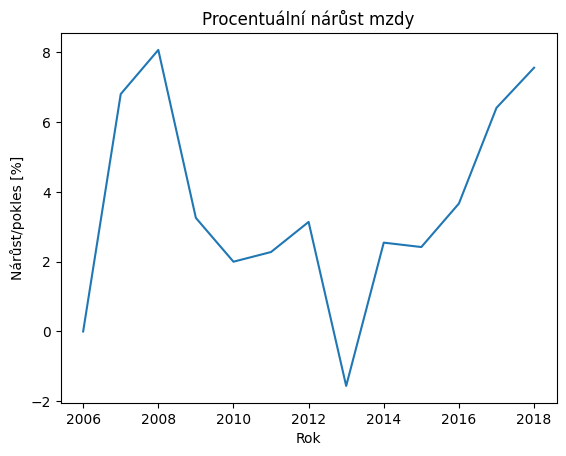

In [4]:
# Údaje o mzdách za jednotlivá sledovaná léta. Výpočet meziročních nárůstů (u prvního roku je 0, protože neznáme údaje z předchozího roku, neznamená to, že k nárůstu nedošlo!).
# Meziroční nárůst v Kč a procentuální nárůst. 
# Grafické znázornění průběhu průměrných mezd. 
mzda = data_ceny[["Rok", "Mzda"]]
mzda.index += 1

mzda_rocni_prumer = mzda[~mzda["Rok"].duplicated()]
mzda_list = list(mzda_rocni_prumer["Mzda"])
max_index = len(mzda_list)
mzda_predchozi = []
mzda_predchozi.append("NaN")
for cislo in mzda_list[:max_index-1]:
    mzda_predchozi.append(cislo)
narust = []
narust.append(0)
for index in range(1, max_index):
    narust.append(mzda_list[index] - mzda_predchozi[index])
narust_procenta = []
narust_procenta.append(0)
for index in range(1, max_index):
    narust_procenta.append((narust[index]/mzda_predchozi[index])*100)
mzda_rocni_prumer.insert(2, "Narust", narust)
mzda_rocni_prumer.insert(3, "Narust - procenta", narust_procenta)
print(mzda_rocni_prumer)

plt.plot(mzda_rocni_prumer["Rok"], mzda_rocni_prumer["Mzda"], label = "Průměrná mzda")
plt.title("Průměrná mzda")
plt.xlabel("Rok")
plt.ylabel("Mzda [Kč]")
plt.show()

plt.plot(mzda_rocni_prumer["Rok"], mzda_rocni_prumer["Narust - procenta"], label = "Meziroční nárůst/pokles průměrné mzdy")
plt.title("Procentuální nárůst mzdy")
plt.xlabel("Rok")
plt.ylabel("Nárůst/pokles [%]")
plt.show()

2006     91.031930
2007     97.187097
2008    103.200182
2009     96.580917
2010     98.458876
2011    101.756979
2012    108.606047
2013    114.143107
2014    114.984906
2015    118.749239
2016    117.335034
2017    128.631470
2018    131.416722
dtype: float64


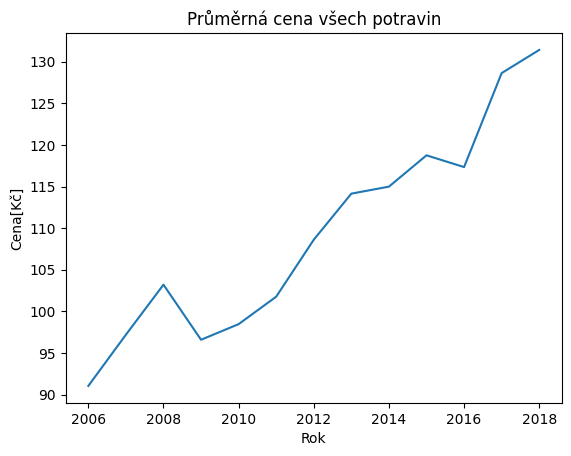

In [5]:
# Průměrná cena všech sledovaných potravin během sledovaného období.
ceny_mzdy = pd.read_csv("SQL project.csv")[["Rok", "Cena", "Mzda"]]
seznam_roky = (ceny_mzdy["Rok"].unique())
pocet_roku = len(seznam_roky)

prumer_cen_potravin = []
for i in seznam_roky:
    data_rok = ceny_mzdy[ceny_mzdy["Rok"] == i]["Cena"]
    prumer_cen_potravin.append(sum(data_rok)/pocet_roku)

prumer_cen_potravin_series = pd.Series(prumer_cen_potravin, seznam_roky)
print(prumer_cen_potravin_series)

plt.plot(seznam_roky, prumer_cen_potravin, label = "Průměrná cena všech potravin")
plt.title("Průměrná cena všech potravin")
plt.xlabel("Rok")
plt.ylabel("Cena[Kč]")
plt.show()

Potravina:  Banány žluté
Minimální cena této potraviny byla 26.97 Kč
Maximální cena této potraviny byla 31.91 Kč
Průměrný meziroční nárůst/pokles této potraviny byl 0.16 Kč / rok
Průměrný meziroční nárůst/pokles této potraviny od začátku do konce sledovaného období byl 7.4 %
Počáteční rok:  2006
Počáteční cena:  27.3
Poslední rok:  2018
Poslední cena:  29.32
     Rok          name       Cena  Hodnota Jednotka        Mzda
0   2006  Banány žluté  27.304640      1.0       kg  20342.3816
1   2007  Banány žluté  30.848056      1.0       kg  21724.6053
2   2008  Banány žluté  30.586391      1.0       kg  23475.1711
3   2009  Banány žluté  30.562139      1.0       kg  24238.1711
4   2010  Banány žluté  27.443303      1.0       kg  24722.1974
5   2011  Banány žluté  26.965667      1.0       kg  25284.3816
6   2012  Banány žluté  31.002556      1.0       kg  26077.1184
7   2013  Banány žluté  31.788611      1.0       kg  25670.8421
8   2014  Banány žluté  31.648278      1.0       kg  26323.5526

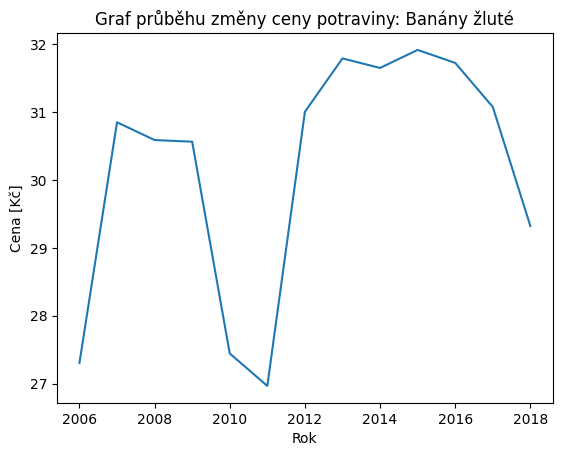

Potravina:  Cukr krystalový
Minimální cena této potraviny byla 15.75 Kč
Maximální cena této potraviny byla 24.27 Kč
Průměrný meziroční nárůst/pokles této potraviny byl -0.46 Kč / rok
Průměrný meziroční nárůst/pokles této potraviny od začátku do konce sledovaného období byl -27.52 %
Počáteční rok:  2006
Počáteční cena:  21.73
Poslední rok:  2018
Poslední cena:  15.75
     Rok             name       Cena  Hodnota Jednotka        Mzda
13  2006  Cukr krystalový  21.726613      1.0       kg  20342.3816
14  2007  Cukr krystalový  21.920708      1.0       kg  21724.6053
15  2008  Cukr krystalový  21.096928      1.0       kg  23475.1711
16  2009  Cukr krystalový  19.811083      1.0       kg  24238.1711
17  2010  Cukr krystalový  18.269424      1.0       kg  24722.1974
18  2011  Cukr krystalový  22.450222      1.0       kg  25284.3816
19  2012  Cukr krystalový  24.266833      1.0       kg  26077.1184
20  2013  Cukr krystalový  24.155000      1.0       kg  25670.8421
21  2014  Cukr krystalový  2

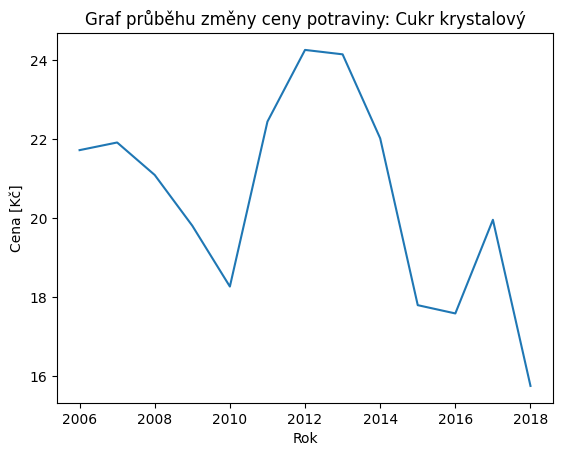

Potravina:  Eidamská cihla
Minimální cena této potraviny byla 110.9 Kč
Maximální cena této potraviny byla 150.61 Kč
Průměrný meziroční nárůst/pokles této potraviny byl 2.42 Kč / rok
Průměrný meziroční nárůst/pokles této potraviny od začátku do konce sledovaného období byl 28.39 %
Počáteční rok:  2006
Počáteční cena:  110.95
Poslední rok:  2018
Poslední cena:  142.45
     Rok            name        Cena  Hodnota Jednotka        Mzda
26  2006  Eidamská cihla  110.946653      1.0       kg  20342.3816
27  2007  Eidamská cihla  122.679889      1.0       kg  21724.6053
28  2008  Eidamská cihla  135.279087      1.0       kg  23475.1711
29  2009  Eidamská cihla  111.666194      1.0       kg  24238.1711
30  2010  Eidamská cihla  119.952091      1.0       kg  24722.1974
31  2011  Eidamská cihla  122.383000      1.0       kg  25284.3816
32  2012  Eidamská cihla  128.079833      1.0       kg  26077.1184
33  2013  Eidamská cihla  141.969444      1.0       kg  25670.8421
34  2014  Eidamská cihla  15

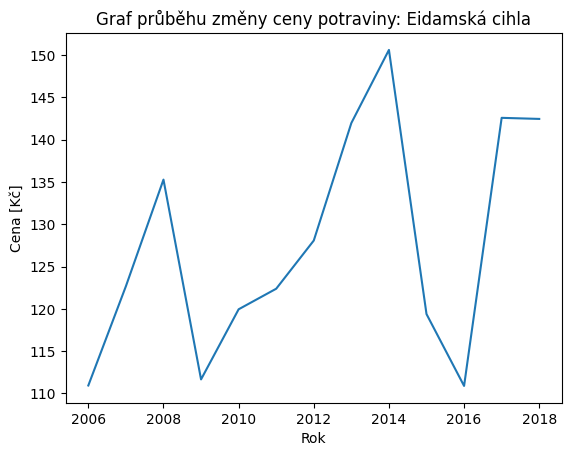

Potravina:  Hovězí maso zadní bez kosti
Minimální cena této potraviny byla 166.34 Kč
Maximální cena této potraviny byla 223.26 Kč
Průměrný meziroční nárůst/pokles této potraviny byl 4.38 Kč / rok
Průměrný meziroční nárůst/pokles této potraviny od začátku do konce sledovaného období byl 34.22 %
Počáteční rok:  2006
Počáteční cena:  166.34
Poslední rok:  2018
Poslední cena:  223.26
     Rok                         name        Cena  Hodnota Jednotka  \
39  2006  Hovězí maso zadní bez kosti  166.337400      1.0       kg   
40  2007  Hovězí maso zadní bez kosti  169.459111      1.0       kg   
41  2008  Hovězí maso zadní bez kosti  175.549319      1.0       kg   
42  2009  Hovězí maso zadní bez kosti  179.006444      1.0       kg   
43  2010  Hovězí maso zadní bez kosti  176.152939      1.0       kg   
44  2011  Hovězí maso zadní bez kosti  180.729167      1.0       kg   
45  2012  Hovězí maso zadní bez kosti  200.806222      1.0       kg   
46  2013  Hovězí maso zadní bez kosti  207.189111

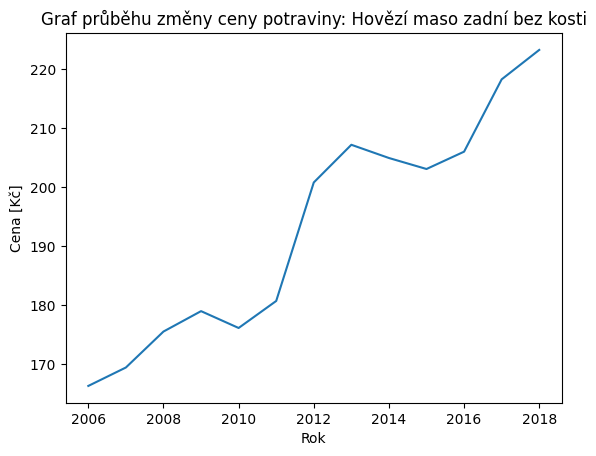

Potravina:  Chléb konzumní kmínový
Minimální cena této potraviny byla 16.12 Kč
Maximální cena této potraviny byla 24.24 Kč
Průměrný meziroční nárůst/pokles této potraviny byl 0.62 Kč / rok
Průměrný meziroční nárůst/pokles této potraviny od začátku do konce sledovaného období byl 50.37 %
Počáteční rok:  2006
Počáteční cena:  16.12
Poslední rok:  2018
Poslední cena:  24.24
     Rok                    name       Cena  Hodnota Jednotka        Mzda
52  2006  Chléb konzumní kmínový  16.123640      1.0       kg  20342.3816
53  2007  Chléb konzumní kmínový  18.846653      1.0       kg  21724.6053
54  2008  Chléb konzumní kmínový  22.882493      1.0       kg  23475.1711
55  2009  Chléb konzumní kmínový  19.584528      1.0       kg  24238.1711
56  2010  Chléb konzumní kmínový  18.392121      1.0       kg  24722.1974
57  2011  Chléb konzumní kmínový  21.631222      1.0       kg  25284.3816
58  2012  Chléb konzumní kmínový  22.913167      1.0       kg  26077.1184
59  2013  Chléb konzumní kmínový  

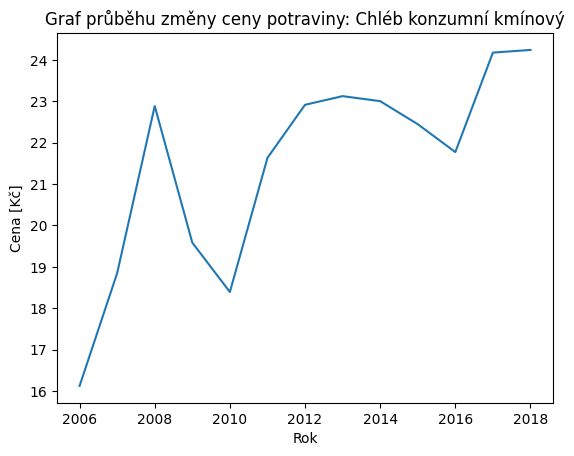

Potravina:  Jablka konzumní
Minimální cena této potraviny byla 25.28 Kč
Maximální cena této potraviny byla 36.17 Kč
Průměrný meziroční nárůst/pokles této potraviny byl 0.42 Kč / rok
Průměrný meziroční nárůst/pokles této potraviny od začátku do konce sledovaného období byl 17.78 %
Počáteční rok:  2006
Počáteční cena:  30.71
Poslední rok:  2018
Poslední cena:  36.17
     Rok             name       Cena  Hodnota Jednotka        Mzda
65  2006  Jablka konzumní  30.714547      1.0       kg  20342.3816
66  2007  Jablka konzumní  28.486569      1.0       kg  21724.6053
67  2008  Jablka konzumní  33.190174      1.0       kg  23475.1711
68  2009  Jablka konzumní  25.850417      1.0       kg  24238.1711
69  2010  Jablka konzumní  25.276879      1.0       kg  24722.1974
70  2011  Jablka konzumní  29.166167      1.0       kg  25284.3816
71  2012  Jablka konzumní  31.002833      1.0       kg  26077.1184
72  2013  Jablka konzumní  34.301944      1.0       kg  25670.8421
73  2014  Jablka konzumní  30.

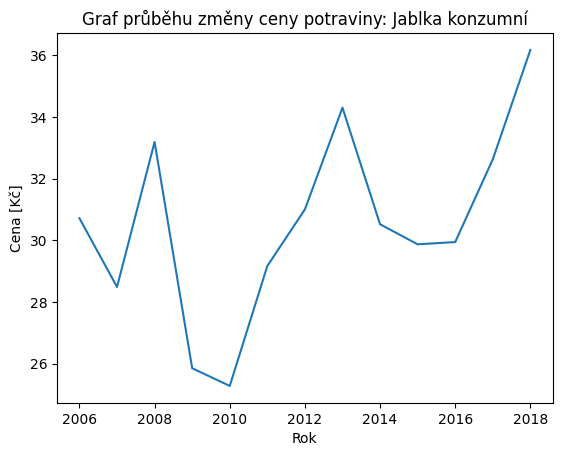

Potravina:  Jakostní víno bílé
Minimální cena této potraviny byla 92.42 Kč
Maximální cena této potraviny byla 100.1 Kč
Průměrný meziroční nárůst/pokles této potraviny byl 1.92 Kč / rok
Průměrný meziroční nárůst/pokles této potraviny od začátku do konce sledovaného období byl 8.31 %
Počáteční rok:  2015
Počáteční cena:  92.42
Poslední rok:  2018
Poslední cena:  100.1
     Rok                name        Cena  Hodnota Jednotka        Mzda
78  2015  Jakostní víno bílé   92.423556     0.75        l  26959.7237
79  2016  Jakostní víno bílé   94.654889     0.75        l  27946.9211
80  2017  Jakostní víno bílé   96.697056     0.75        l  29735.7763
81  2018  Jakostní víno bílé  100.097000     0.75        l  31980.2632


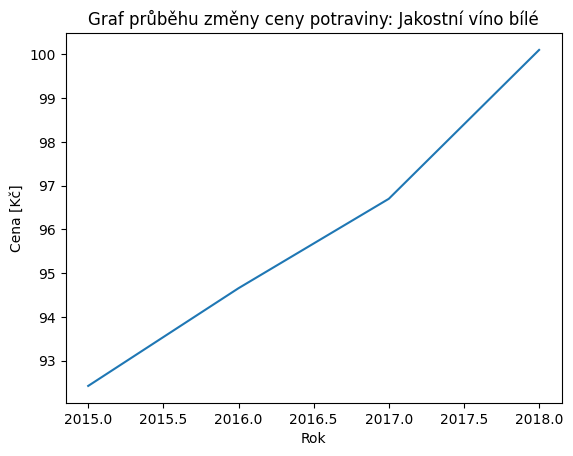

Potravina:  Jogurt bílý netučný
Minimální cena této potraviny byla 5.83 Kč
Maximální cena této potraviny byla 9.17 Kč
Průměrný meziroční nárůst/pokles této potraviny byl 0.26 Kč / rok
Průměrný meziroční nárůst/pokles této potraviny od začátku do konce sledovaného období byl 57.29 %
Počáteční rok:  2006
Počáteční cena:  5.83
Poslední rok:  2018
Poslední cena:  9.17
     Rok                 name      Cena  Hodnota Jednotka        Mzda
82  2006  Jogurt bílý netučný  5.829360    150.0        g  20342.3816
83  2007  Jogurt bílý netučný  5.876167    150.0        g  21724.6053
84  2008  Jogurt bílý netučný  6.280551    150.0        g  23475.1711
85  2009  Jogurt bílý netučný  6.083667    150.0        g  24238.1711
86  2010  Jogurt bílý netučný  6.256545    150.0        g  24722.1974
87  2011  Jogurt bílý netučný  6.514222    150.0        g  25284.3816
88  2012  Jogurt bílý netučný  7.160111    150.0        g  26077.1184
89  2013  Jogurt bílý netučný  7.697778    150.0        g  25670.8421
90 

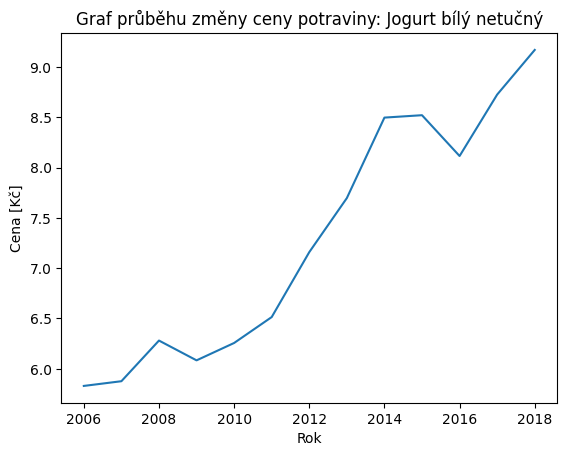

Potravina:  Kapr živý
Minimální cena této potraviny byla 69.35 Kč
Maximální cena této potraviny byla 93.46 Kč
Průměrný meziroční nárůst/pokles této potraviny byl 1.85 Kč / rok
Průměrný meziroční nárůst/pokles této potraviny od začátku do konce sledovaného období byl 34.77 %
Počáteční rok:  2006
Počáteční cena:  69.35
Poslední rok:  2018
Poslední cena:  93.46
      Rok       name       Cena  Hodnota Jednotka        Mzda
95   2006  Kapr živý  69.349778      1.0       kg  20342.3816
96   2007  Kapr živý  78.966905      1.0       kg  21724.6053
97   2008  Kapr živý  80.440000      1.0       kg  23475.1711
98   2009  Kapr živý  81.995333      1.0       kg  24238.1711
99   2010  Kapr živý  84.377333      1.0       kg  24722.1974
100  2011  Kapr živý  86.850000      1.0       kg  25284.3816
101  2012  Kapr živý  90.092000      1.0       kg  26077.1184
102  2013  Kapr živý  88.094667      1.0       kg  25670.8421
103  2014  Kapr živý  86.373333      1.0       kg  26323.5526
104  2015  Kapr živ

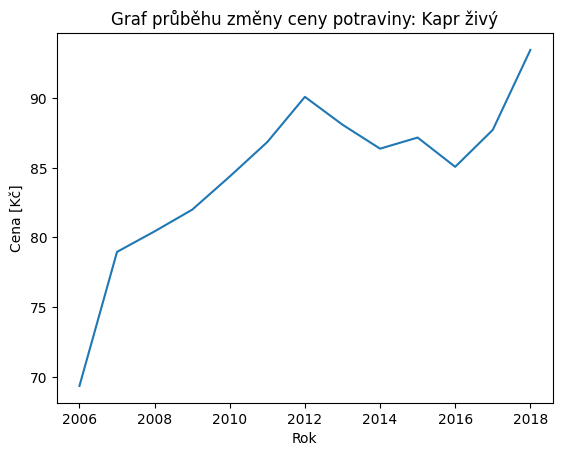

Potravina:  Konzumní brambory
Minimální cena této potraviny byla 10.22 Kč
Maximální cena této potraviny byla 16.93 Kč
Průměrný meziroční nárůst/pokles této potraviny byl 0.23 Kč / rok
Průměrný meziroční nárůst/pokles této potraviny od začátku do konce sledovaného období byl 24.94 %
Počáteční rok:  2006
Počáteční cena:  12.07
Poslední rok:  2018
Poslední cena:  15.08
      Rok               name       Cena  Hodnota Jednotka        Mzda
108  2006  Konzumní brambory  12.074920      1.0       kg  20342.3816
109  2007  Konzumní brambory  14.102750      1.0       kg  21724.6053
110  2008  Konzumní brambory  10.783609      1.0       kg  23475.1711
111  2009  Konzumní brambory  10.221583      1.0       kg  24238.1711
112  2010  Konzumní brambory  13.273909      1.0       kg  24722.1974
113  2011  Konzumní brambory  13.528722      1.0       kg  25284.3816
114  2012  Konzumní brambory  10.561500      1.0       kg  26077.1184
115  2013  Konzumní brambory  16.934722      1.0       kg  25670.8421
1

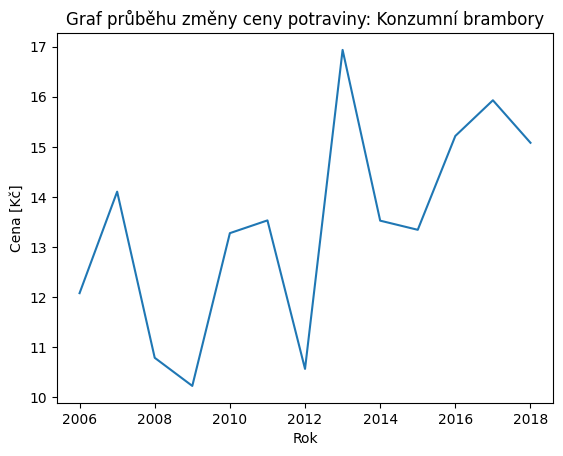

Potravina:  Kuřata kuchaná celá
Minimální cena této potraviny byla 47.47 Kč
Maximální cena této potraviny byla 71.77 Kč
Průměrný meziroční nárůst/pokles této potraviny byl 1.68 Kč / rok
Průměrný meziroční nárůst/pokles této potraviny od začátku do konce sledovaného období byl 46.01 %
Počáteční rok:  2006
Počáteční cena:  47.47
Poslední rok:  2018
Poslední cena:  69.31
      Rok                 name       Cena  Hodnota Jednotka        Mzda
121  2006  Kuřata kuchaná celá  47.473760      1.0       kg  20342.3816
122  2007  Kuřata kuchaná celá  53.609875      1.0       kg  21724.6053
123  2008  Kuřata kuchaná celá  60.855783      1.0       kg  23475.1711
124  2009  Kuřata kuchaná celá  57.860444      1.0       kg  24238.1711
125  2010  Kuřata kuchaná celá  56.900909      1.0       kg  24722.1974
126  2011  Kuřata kuchaná celá  58.295667      1.0       kg  25284.3816
127  2012  Kuřata kuchaná celá  62.899556      1.0       kg  26077.1184
128  2013  Kuřata kuchaná celá  69.296222      1.0   

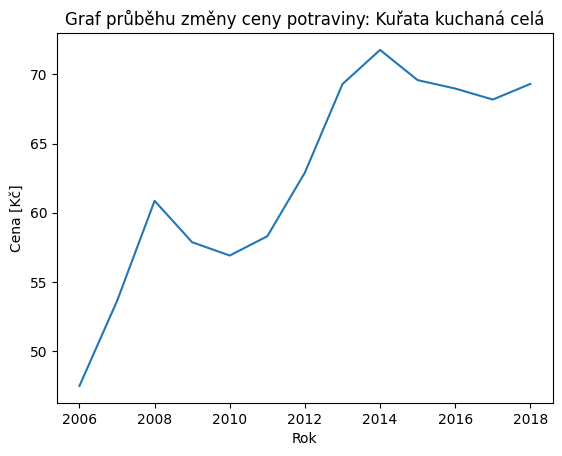

Potravina:  Máslo
Minimální cena této potraviny byla 96.09 Kč
Maximální cena této potraviny byla 207.08 Kč
Průměrný meziroční nárůst/pokles této potraviny byl 7.9 Kč / rok
Průměrný meziroční nárůst/pokles této potraviny od začátku do konce sledovaného období byl 98.37 %
Počáteční rok:  2006
Počáteční cena:  104.39
Poslední rok:  2018
Poslední cena:  207.08
      Rok   name        Cena  Hodnota Jednotka        Mzda
134  2006  Máslo  104.387827      1.0       kg  20342.3816
135  2007  Máslo  115.784694      1.0       kg  21724.6053
136  2008  Máslo  114.740899      1.0       kg  23475.1711
137  2009  Máslo   96.094583      1.0       kg  24238.1711
138  2010  Máslo  118.391939      1.0       kg  24722.1974
139  2011  Máslo  139.188333      1.0       kg  25284.3816
140  2012  Máslo  137.034000      1.0       kg  26077.1184
141  2013  Máslo  154.802722      1.0       kg  25670.8421
142  2014  Máslo  162.971111      1.0       kg  26323.5526
143  2015  Máslo  157.036222      1.0       kg  269

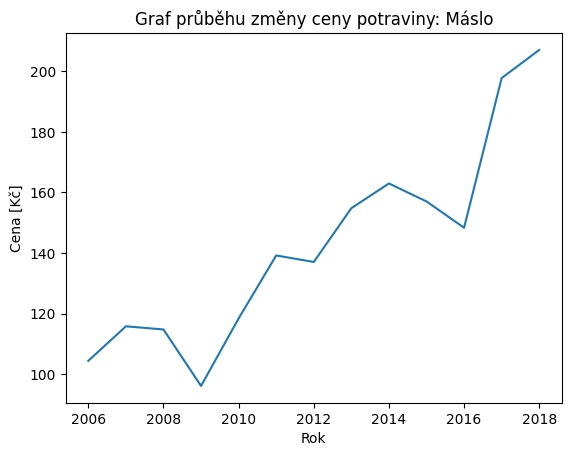

Potravina:  Mléko polotučné pasterované
Minimální cena této potraviny byla 14.44 Kč
Maximální cena této potraviny byla 20.7 Kč
Průměrný meziroční nárůst/pokles této potraviny byl 0.41 Kč / rok
Průměrný meziroční nárůst/pokles této potraviny od začátku do konce sledovaného období byl 37.26 %
Počáteční rok:  2006
Počáteční cena:  14.44
Poslední rok:  2018
Poslední cena:  19.82
      Rok                         name       Cena  Hodnota Jednotka  \
147  2006  Mléko polotučné pasterované  14.437840      1.0        l   
148  2007  Mléko polotučné pasterované  15.592250      1.0        l   
149  2008  Mléko polotučné pasterované  17.931580      1.0        l   
150  2009  Mléko polotučné pasterované  15.658250      1.0        l   
151  2010  Mléko polotučné pasterované  16.034424      1.0        l   
152  2011  Mléko polotučné pasterované  17.645611      1.0        l   
153  2012  Mléko polotučné pasterované  18.801167      1.0        l   
154  2013  Mléko polotučné pasterované  19.343889     

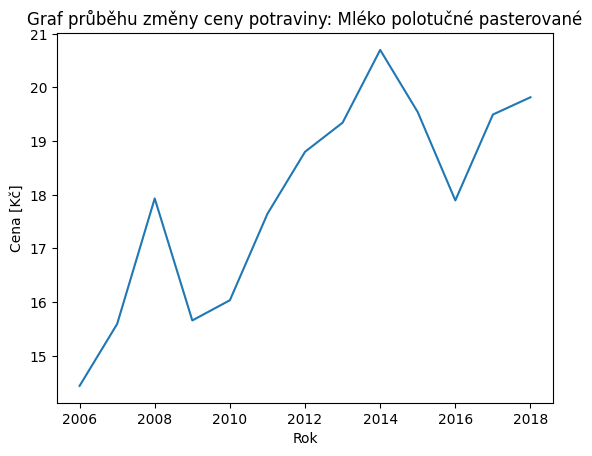

Potravina:  Mrkev
Minimální cena této potraviny byla 14.18 Kč
Maximální cena této potraviny byla 22.45 Kč
Průměrný meziroční nárůst/pokles této potraviny byl 0.62 Kč / rok
Průměrný meziroční nárůst/pokles této potraviny od začátku do konce sledovaného období byl 55.79 %
Počáteční rok:  2006
Počáteční cena:  14.41
Poslední rok:  2018
Poslední cena:  22.45
      Rok   name       Cena  Hodnota Jednotka        Mzda
160  2006  Mrkev  14.409267      1.0       kg  20342.3816
161  2007  Mrkev  14.176750      1.0       kg  21724.6053
162  2008  Mrkev  16.875391      1.0       kg  23475.1711
163  2009  Mrkev  16.564639      1.0       kg  24238.1711
164  2010  Mrkev  15.790909      1.0       kg  24722.1974
165  2011  Mrkev  16.436556      1.0       kg  25284.3816
166  2012  Mrkev  17.443000      1.0       kg  26077.1184
167  2013  Mrkev  18.591778      1.0       kg  25670.8421
168  2014  Mrkev  16.216722      1.0       kg  26323.5526
169  2015  Mrkev  20.836556      1.0       kg  26959.7237
170  

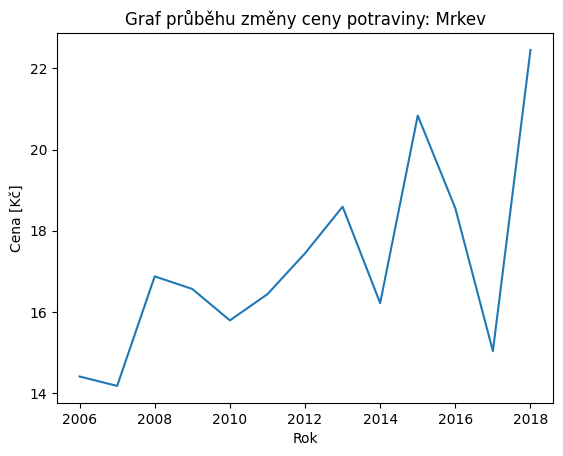

Potravina:  Papriky
Minimální cena této potraviny byla 35.31 Kč
Maximální cena této potraviny byla 68.79 Kč
Průměrný meziroční nárůst/pokles této potraviny byl 1.94 Kč / rok
Průměrný meziroční nárůst/pokles této potraviny od začátku do konce sledovaného období byl 71.25 %
Počáteční rok:  2006
Počáteční cena:  35.31
Poslední rok:  2018
Poslední cena:  60.47
      Rok     name       Cena  Hodnota Jednotka        Mzda
173  2006  Papriky  35.310160      1.0       kg  20342.3816
174  2007  Papriky  68.788972      1.0       kg  21724.6053
175  2008  Papriky  62.299391      1.0       kg  23475.1711
176  2009  Papriky  51.703306      1.0       kg  24238.1711
177  2010  Papriky  61.496303      1.0       kg  24722.1974
178  2011  Papriky  53.286611      1.0       kg  25284.3816
179  2012  Papriky  58.833056      1.0       kg  26077.1184
180  2013  Papriky  61.858944      1.0       kg  25670.8421
181  2014  Papriky  60.548167      1.0       kg  26323.5526
182  2015  Papriky  63.521556      1.0   

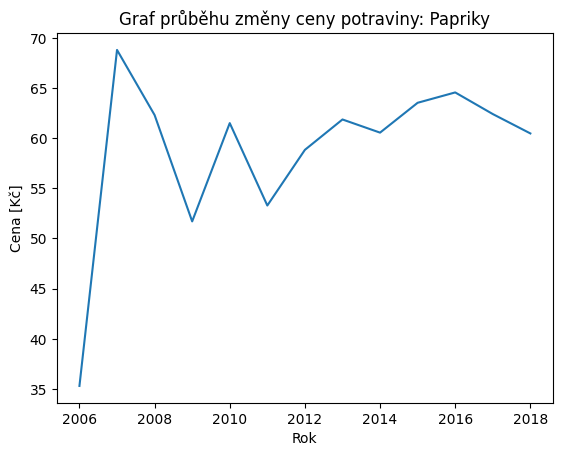

Potravina:  Pečivo pšeničné bílé
Minimální cena této potraviny byla 33.54 Kč
Maximální cena této potraviny byla 54.31 Kč
Průměrný meziroční nárůst/pokles této potraviny byl 0.4 Kč / rok
Průměrný meziroční nárůst/pokles této potraviny od začátku do konce sledovaného období byl 13.58 %
Počáteční rok:  2006
Počáteční cena:  38.6
Poslední rok:  2018
Poslední cena:  43.84
      Rok                  name       Cena  Hodnota Jednotka        Mzda
186  2006  Pečivo pšeničné bílé  38.596427      1.0       kg  20342.3816
187  2007  Pečivo pšeničné bílé  44.043833      1.0       kg  21724.6053
188  2008  Pečivo pšeničné bílé  54.311928      1.0       kg  23475.1711
189  2009  Pečivo pšeničné bílé  38.833861      1.0       kg  24238.1711
190  2010  Pečivo pšeničné bílé  33.536515      1.0       kg  24722.1974
191  2011  Pečivo pšeničné bílé  43.247167      1.0       kg  25284.3816
192  2012  Pečivo pšeničné bílé  43.669778      1.0       kg  26077.1184
193  2013  Pečivo pšeničné bílé  41.979222    

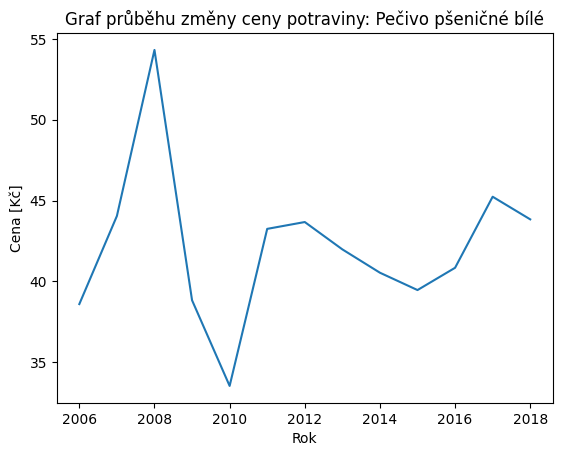

Potravina:  Pivo výčepní, světlé, lahvové
Minimální cena této potraviny byla 8.45 Kč
Maximální cena této potraviny byla 11.81 Kč
Průměrný meziroční nárůst/pokles této potraviny byl 0.26 Kč / rok
Průměrný meziroční nárůst/pokles této potraviny od začátku do konce sledovaného období byl 39.76 %
Počáteční rok:  2006
Počáteční cena:  8.45
Poslední rok:  2018
Poslední cena:  11.81
      Rok                           name       Cena  Hodnota Jednotka  \
199  2006  Pivo výčepní, světlé, lahvové   8.449613      0.5        l   
200  2007  Pivo výčepní, světlé, lahvové   8.509194      0.5        l   
201  2008  Pivo výčepní, světlé, lahvové   8.966130      0.5        l   
202  2009  Pivo výčepní, světlé, lahvové   9.183750      0.5        l   
203  2010  Pivo výčepní, světlé, lahvové   9.890030      0.5        l   
204  2011  Pivo výčepní, světlé, lahvové  10.052611      0.5        l   
205  2012  Pivo výčepní, světlé, lahvové  10.159111      0.5        l   
206  2013  Pivo výčepní, světlé, lahv

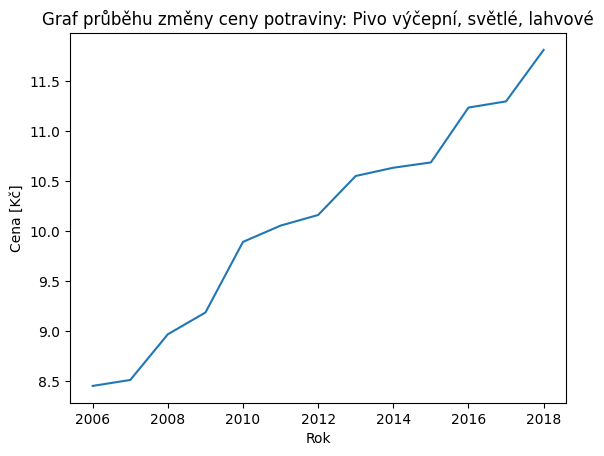

Potravina:  Pomeranče
Minimální cena této potraviny byla 24.73 Kč
Maximální cena této potraviny byla 36.5 Kč
Průměrný meziroční nárůst/pokles této potraviny byl 0.91 Kč / rok
Průměrný meziroční nárůst/pokles této potraviny od začátku do konce sledovaného období byl 47.59 %
Počáteční rok:  2006
Počáteční cena:  24.73
Poslední rok:  2018
Poslední cena:  36.5
      Rok       name       Cena  Hodnota Jednotka        Mzda
212  2006  Pomeranče  24.733173      1.0       kg  20342.3816
213  2007  Pomeranče  30.231292      1.0       kg  21724.6053
214  2008  Pomeranče  31.289014      1.0       kg  23475.1711
215  2009  Pomeranče  29.790056      1.0       kg  24238.1711
216  2010  Pomeranče  30.617758      1.0       kg  24722.1974
217  2011  Pomeranče  28.063278      1.0       kg  25284.3816
218  2012  Pomeranče  30.185500      1.0       kg  26077.1184
219  2013  Pomeranče  31.369611      1.0       kg  25670.8421
220  2014  Pomeranče  29.683056      1.0       kg  26323.5526
221  2015  Pomeranče 

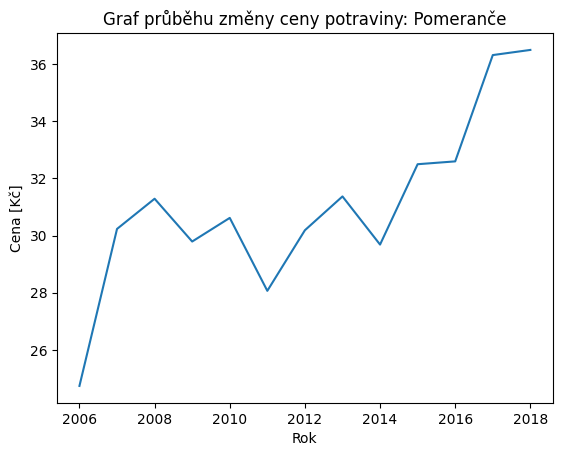

Potravina:  Přírodní minerální voda uhličitá
Minimální cena této potraviny byla 7.69 Kč
Maximální cena této potraviny byla 8.89 Kč
Průměrný meziroční nárůst/pokles této potraviny byl 0.07 Kč / rok
Průměrný meziroční nárůst/pokles této potraviny od začátku do konce sledovaného období byl 12.35 %
Počáteční rok:  2006
Počáteční cena:  7.69
Poslední rok:  2018
Poslední cena:  8.64
      Rok                              name      Cena  Hodnota Jednotka  \
225  2006  Přírodní minerální voda uhličitá  7.687920      1.0        l   
226  2007  Přírodní minerální voda uhličitá  7.727764      1.0        l   
227  2008  Přírodní minerální voda uhličitá  8.269522      1.0        l   
228  2009  Přírodní minerální voda uhličitá  8.213389      1.0        l   
229  2010  Přírodní minerální voda uhličitá  8.032848      1.0        l   
230  2011  Přírodní minerální voda uhličitá  8.291444      1.0        l   
231  2012  Přírodní minerální voda uhličitá  8.894833      1.0        l   
232  2013  Přírodní 

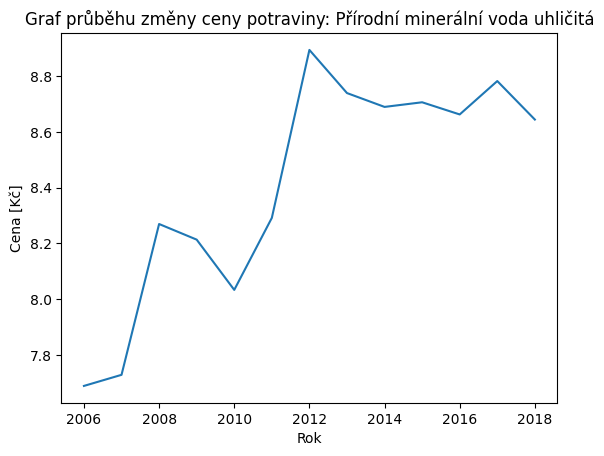

Potravina:  Pšeničná mouka hladká
Minimální cena této potraviny byla 7.41 Kč
Maximální cena této potraviny byla 13.34 Kč
Průměrný meziroční nárůst/pokles této potraviny byl 0.31 Kč / rok
Průměrný meziroční nárůst/pokles této potraviny od začátku do konce sledovaného období byl 54.39 %
Počáteční rok:  2006
Počáteční cena:  7.41
Poslední rok:  2018
Poslední cena:  11.44
      Rok                   name       Cena  Hodnota Jednotka        Mzda
238  2006  Pšeničná mouka hladká   7.407573      1.0       kg  20342.3816
239  2007  Pšeničná mouka hladká   9.084278      1.0       kg  21724.6053
240  2008  Pšeničná mouka hladká  12.981826      1.0       kg  23475.1711
241  2009  Pšeničná mouka hladká   9.970444      1.0       kg  24238.1711
242  2010  Pšeničná mouka hladká   8.770424      1.0       kg  24722.1974
243  2011  Pšeničná mouka hladká  11.441000      1.0       kg  25284.3816
244  2012  Pšeničná mouka hladká  11.528889      1.0       kg  26077.1184
245  2013  Pšeničná mouka hladká  13.

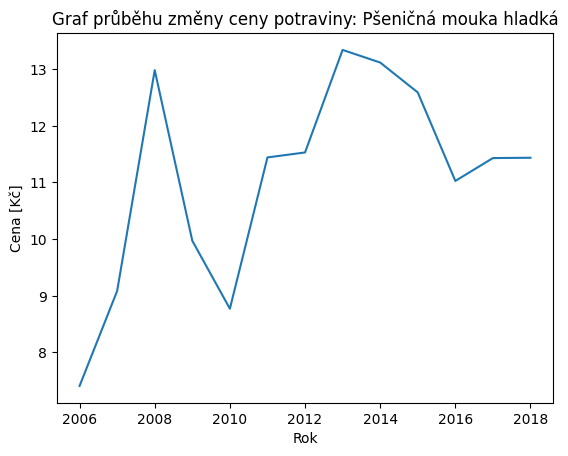

Potravina:  Rajská jablka červená kulatá
Minimální cena této potraviny byla 30.31 Kč
Maximální cena této potraviny byla 57.83 Kč
Průměrný meziroční nárůst/pokles této potraviny byl -1.03 Kč / rok
Průměrný meziroční nárůst/pokles této potraviny od začátku do konce sledovaného období byl -23.07 %
Počáteční rok:  2006
Počáteční cena:  57.83
Poslední rok:  2018
Poslední cena:  44.49
      Rok                          name       Cena  Hodnota Jednotka  \
251  2006  Rajská jablka červená kulatá  57.829613      1.0       kg   
252  2007  Rajská jablka červená kulatá  40.319653      1.0       kg   
253  2008  Rajská jablka červená kulatá  35.577362      1.0       kg   
254  2009  Rajská jablka červená kulatá  34.916944      1.0       kg   
255  2010  Rajská jablka červená kulatá  42.209364      1.0       kg   
256  2011  Rajská jablka červená kulatá  30.306222      1.0       kg   
257  2012  Rajská jablka červená kulatá  37.854833      1.0       kg   
258  2013  Rajská jablka červená kulatá  3

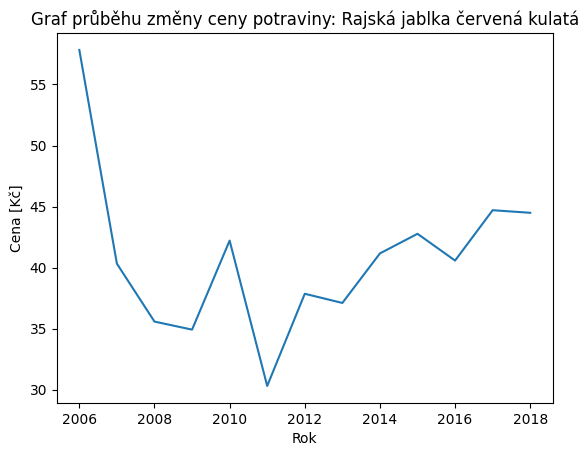

Potravina:  Rostlinný roztíratelný tuk
Minimální cena této potraviny byla 69.45 Kč
Maximální cena této potraviny byla 99.4 Kč
Průměrný meziroční nárůst/pokles této potraviny byl 2.3 Kč / rok
Průměrný meziroční nárůst/pokles této potraviny od začátku do konce sledovaného období byl 43.12 %
Počáteční rok:  2006
Počáteční cena:  69.45
Poslední rok:  2018
Poslední cena:  99.4
      Rok                        name       Cena  Hodnota Jednotka        Mzda
264  2006  Rostlinný roztíratelný tuk  69.452120      1.0       kg  20342.3816
265  2007  Rostlinný roztíratelný tuk  69.502944      1.0       kg  21724.6053
266  2008  Rostlinný roztíratelný tuk  84.396333      1.0       kg  23475.1711
267  2009  Rostlinný roztíratelný tuk  84.409556      1.0       kg  24238.1711
268  2010  Rostlinný roztíratelný tuk  80.421424      1.0       kg  24722.1974
269  2011  Rostlinný roztíratelný tuk  88.724167      1.0       kg  25284.3816
270  2012  Rostlinný roztíratelný tuk  90.017167      1.0       kg  2607

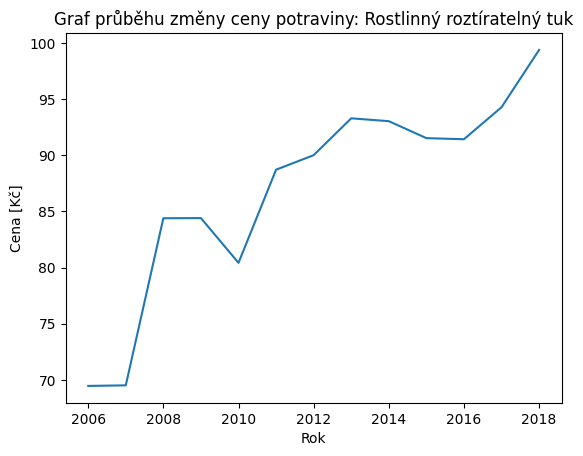

Potravina:  Rýže loupaná dlouhozrnná
Minimální cena této potraviny byla 21.29 Kč
Maximální cena této potraviny byla 36.52 Kč
Průměrný meziroční nárůst/pokles této potraviny byl 1.15 Kč / rok
Průměrný meziroční nárůst/pokles této potraviny od začátku do konce sledovaného období byl 69.94 %
Počáteční rok:  2006
Počáteční cena:  21.29
Poslední rok:  2018
Poslední cena:  36.18
      Rok                      name       Cena  Hodnota Jednotka        Mzda
277  2006  Rýže loupaná dlouhozrnná  21.289667      1.0       kg  20342.3816
278  2007  Rýže loupaná dlouhozrnná  23.856986      1.0       kg  21724.6053
279  2008  Rýže loupaná dlouhozrnná  32.690522      1.0       kg  23475.1711
280  2009  Rýže loupaná dlouhozrnná  36.102306      1.0       kg  24238.1711
281  2010  Rýže loupaná dlouhozrnná  33.926636      1.0       kg  24722.1974
282  2011  Rýže loupaná dlouhozrnná  33.336167      1.0       kg  25284.3816
283  2012  Rýže loupaná dlouhozrnná  34.043944      1.0       kg  26077.1184
284  201

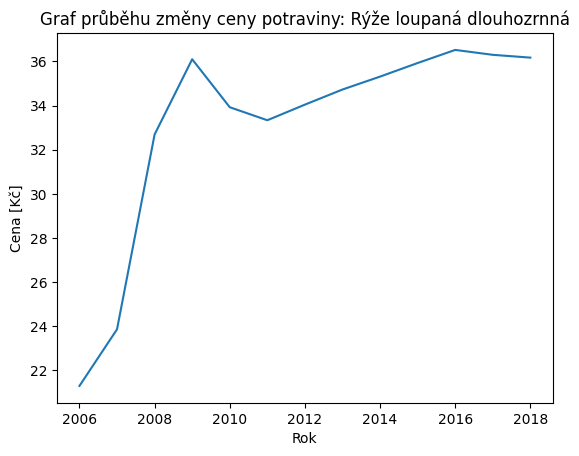

Potravina:  Šunkový salám
Minimální cena této potraviny byla 115.91 Kč
Maximální cena této potraviny byla 144.88 Kč
Průměrný meziroční nárůst/pokles této potraviny byl 2.16 Kč / rok
Průměrný meziroční nárůst/pokles této potraviny od začátku do konce sledovaného období byl 24.07 %
Počáteční rok:  2006
Počáteční cena:  116.77
Poslední rok:  2018
Poslední cena:  144.88
      Rok           name        Cena  Hodnota Jednotka        Mzda
290  2006  Šunkový salám  116.774413      1.0       kg  20342.3816
291  2007  Šunkový salám  116.439167      1.0       kg  21724.6053
292  2008  Šunkový salám  118.981101      1.0       kg  23475.1711
293  2009  Šunkový salám  117.991417      1.0       kg  24238.1711
294  2010  Šunkový salám  116.983939      1.0       kg  24722.1974
295  2011  Šunkový salám  115.912222      1.0       kg  25284.3816
296  2012  Šunkový salám  121.745833      1.0       kg  26077.1184
297  2013  Šunkový salám  126.238611      1.0       kg  25670.8421
298  2014  Šunkový salám  12

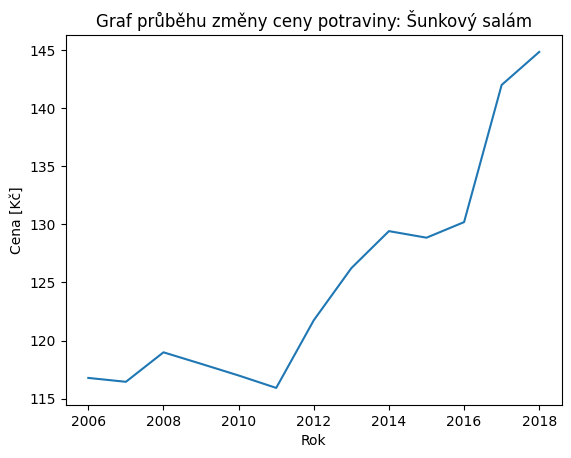

Potravina:  Těstoviny vaječné
Minimální cena této potraviny byla 26.1 Kč
Maximální cena této potraviny byla 47.87 Kč
Průměrný meziroční nárůst/pokles této potraviny byl 1.67 Kč / rok
Průměrný meziroční nárůst/pokles této potraviny od začátku do konce sledovaného období byl 83.41 %
Počáteční rok:  2006
Počáteční cena:  26.1
Poslední rok:  2018
Poslední cena:  47.87
      Rok               name       Cena  Hodnota Jednotka        Mzda
303  2006  Těstoviny vaječné  26.095533      1.0       kg  20342.3816
304  2007  Těstoviny vaječné  26.712417      1.0       kg  21724.6053
305  2008  Těstoviny vaječné  30.760319      1.0       kg  23475.1711
306  2009  Těstoviny vaječné  30.975583      1.0       kg  24238.1711
307  2010  Těstoviny vaječné  31.938061      1.0       kg  24722.1974
308  2011  Těstoviny vaječné  35.143444      1.0       kg  25284.3816
309  2012  Těstoviny vaječné  37.545333      1.0       kg  26077.1184
310  2013  Těstoviny vaječné  41.004889      1.0       kg  25670.8421
311

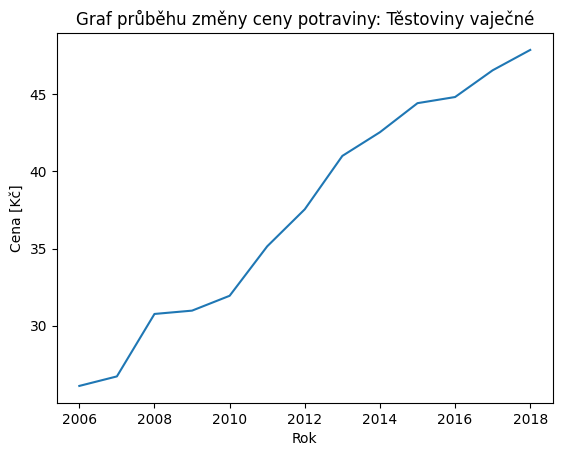

Potravina:  Vejce slepičí čerstvá
Minimální cena této potraviny byla 23.21 Kč
Maximální cena této potraviny byla 38.39 Kč
Průměrný meziroční nárůst/pokles této potraviny byl 1.15 Kč / rok
Průměrný meziroční nárůst/pokles této potraviny od začátku do konce sledovaného období byl 63.43 %
Počáteční rok:  2006
Počáteční cena:  23.49
Poslední rok:  2018
Poslední cena:  38.39
      Rok                   name       Cena  Hodnota Jednotka        Mzda
316  2006  Vejce slepičí čerstvá  23.494840     10.0       ks  20342.3816
317  2007  Vejce slepičí čerstvá  24.970097     10.0       ks  21724.6053
318  2008  Vejce slepičí čerstvá  28.124855     10.0       ks  23475.1711
319  2009  Vejce slepičí čerstvá  26.020750     10.0       ks  24238.1711
320  2010  Vejce slepičí čerstvá  25.146394     10.0       ks  24722.1974
321  2011  Vejce slepičí čerstvá  23.210333     10.0       ks  25284.3816
322  2012  Vejce slepičí čerstvá  35.921611     10.0       ks  26077.1184
323  2013  Vejce slepičí čerstvá  3

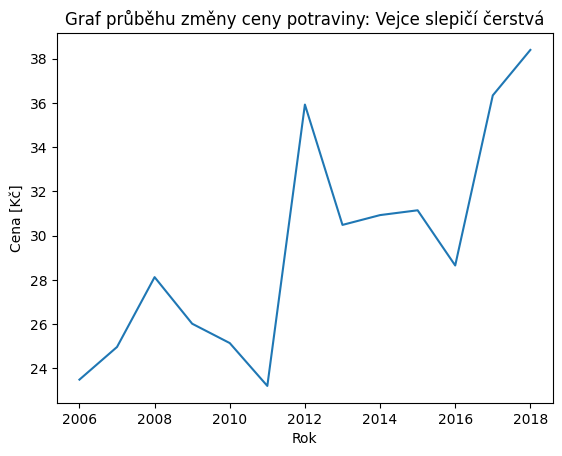

Potravina:  Vepřová pečeně s kostí
Minimální cena této potraviny byla 100.04 Kč
Maximální cena této potraviny byla 118.27 Kč
Průměrný meziroční nárůst/pokles této potraviny byl 0.9 Kč / rok
Průměrný meziroční nárůst/pokles této potraviny od začátku do konce sledovaného období byl 11.1 %
Počáteční rok:  2006
Počáteční cena:  105.18
Poslední rok:  2018
Poslední cena:  116.85
      Rok                    name        Cena  Hodnota Jednotka        Mzda
329  2006  Vepřová pečeně s kostí  105.177787      1.0       kg  20342.3816
330  2007  Vepřová pečeně s kostí  102.895292      1.0       kg  21724.6053
331  2008  Vepřová pečeně s kostí  106.461855      1.0       kg  23475.1711
332  2009  Vepřová pečeně s kostí  106.481250      1.0       kg  24238.1711
333  2010  Vepřová pečeně s kostí  100.482970      1.0       kg  24722.1974
334  2011  Vepřová pečeně s kostí  100.041500      1.0       kg  25284.3816
335  2012  Vepřová pečeně s kostí  109.415944      1.0       kg  26077.1184
336  2013  Vepřo

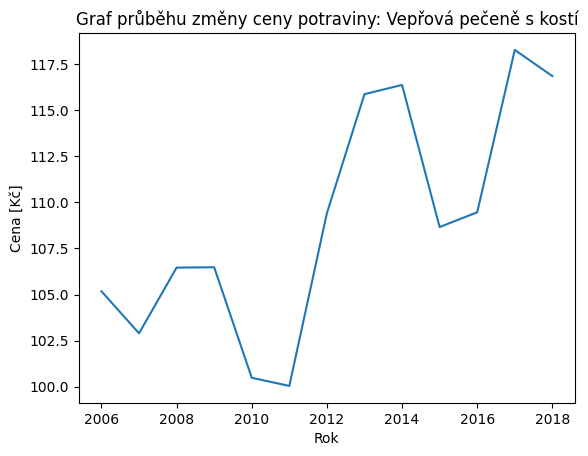

In [6]:
# Statistika jednotlivých potravin.
# Grafické znázornění průběhu změny ceny v průběhu let.
max_index = len(potraviny)
mezirocni_narusty_cen = []
mezirocni_narusty_cen_procenta = []
for index in range(0, max_index):
    tabulka_potravina = (data_ceny[data_ceny["name"] == potraviny[index]])
    tabulka_potravina = tabulka_potravina.iloc[:,[4,0,1,2,3,5]]
    pocet_let = len(tabulka_potravina)
    print("Potravina: ", potraviny[index])
    min_cena = round((min(data_ceny[data_ceny["name"] == potraviny[index]]["Cena"])), 2)
    max_cena = round((max(data_ceny[data_ceny["name"] == potraviny[index]]["Cena"])), 2)
    pocatecni_cena = round(list(data_ceny[data_ceny["name"] == potraviny[index]]["Cena"])[0], 2)
    posledni_cena = round(list(data_ceny[data_ceny["name"] == potraviny[index]]["Cena"])[pocet_let-1], 2)
    prvni_rok = (min(data_ceny[data_ceny["name"] == potraviny[index]]["Rok"]))
    posledni_rok = (max(data_ceny[data_ceny["name"] == potraviny[index]]["Rok"]))
    prumerny_mezirocni_narust_ceny = round((posledni_cena - pocatecni_cena) / pocet_let, 2)
    prumerny_mezirocni_narust_ceny_procenta = round(((posledni_cena - pocatecni_cena) / pocatecni_cena) * 100, 2)
    print(f"Minimální cena této potraviny byla {min_cena} Kč")
    print(f"Maximální cena této potraviny byla {max_cena} Kč")
    print(f"Průměrný meziroční nárůst/pokles této potraviny byl {prumerny_mezirocni_narust_ceny} Kč / rok")
    print(f"Průměrný meziroční nárůst/pokles této potraviny od začátku do konce sledovaného období byl {prumerny_mezirocni_narust_ceny_procenta} %")
    print("Počáteční rok: ", prvni_rok)
    print("Počáteční cena: ", pocatecni_cena)
    print("Poslední rok: ", posledni_rok)
    print("Poslední cena: ", posledni_cena)
    mezirocni_narusty_cen.append(prumerny_mezirocni_narust_ceny)
    mezirocni_narusty_cen_procenta.append(prumerny_mezirocni_narust_ceny_procenta)
    print(tabulka_potravina)
    plt.plot(data_ceny[data_ceny["name"] == potraviny[index]]["Rok"], data_ceny[data_ceny["name"] == potraviny[index]]["Cena"], label = potraviny[index])
    plt.title(f"Graf průběhu změny ceny potraviny: {potraviny[index]}")
    plt.xlabel("Rok")
    plt.ylabel("Cena [Kč]")
    plt.show()

In [305]:
# Tabulka meziročních změn cen potravin ve vybraném období
# Některé potraviny zlevnily, tj cena v posledním roce je nižší než v prvním roce! Proto záporná hodnota.
potraviny_narusty_cen = pd.Series(mezirocni_narusty_cen, potraviny)
print("Meziroční nárůsty cen potravin ve vybraném období - Kč")
print("-----------------------------------------")
print(potraviny_narusty_cen.sort_values())

Meziroční nárůsty cen potravin ve vybraném období - Kč
-----------------------------------------
Rajská jablka červená kulatá       -1.03
Cukr krystalový                    -0.46
Přírodní minerální voda uhličitá    0.07
Banány žluté                        0.16
Konzumní brambory                   0.23
Pivo výčepní, světlé, lahvové       0.26
Jogurt bílý netučný                 0.26
Pšeničná mouka hladká               0.31
Pečivo pšeničné bílé                0.40
Mléko polotučné pasterované         0.41
Jablka konzumní                     0.42
Mrkev                               0.62
Chléb konzumní kmínový              0.62
Vepřová pečeně s kostí              0.90
Pomeranče                           0.91
Vejce slepičí čerstvá               1.15
Rýže loupaná dlouhozrnná            1.15
Těstoviny vaječné                   1.67
Kuřata kuchaná celá                 1.68
Kapr živý                           1.85
Jakostní víno bílé                  1.92
Papriky                             1.94
Š

In [306]:
# Tabulka meziročních změn cen potravin ve vybraném období - procentuální
# Některé potraviny zlevnily, tj cena v posledním roce je nižší než v prvním roce! Proto záporná hodnota.
potraviny_narusty_cen_procenta = pd.Series(mezirocni_narusty_cen_procenta, potraviny)
print("Meziroční nárůsty cen potravin ve vybraném období - % ")
print("-----------------------------------------")
print(potraviny_narusty_cen_procenta.sort_values())

Meziroční nárůsty cen potravin ve vybraném období - % 
-----------------------------------------
Cukr krystalový                    -27.52
Rajská jablka červená kulatá       -23.07
Banány žluté                         7.40
Jakostní víno bílé                   8.31
Vepřová pečeně s kostí              11.10
Přírodní minerální voda uhličitá    12.35
Pečivo pšeničné bílé                13.58
Jablka konzumní                     17.78
Šunkový salám                       24.07
Konzumní brambory                   24.94
Eidamská cihla                      28.39
Hovězí maso zadní bez kosti         34.22
Kapr živý                           34.77
Mléko polotučné pasterované         37.26
Pivo výčepní, světlé, lahvové       39.76
Rostlinný roztíratelný tuk          43.12
Kuřata kuchaná celá                 46.01
Pomeranče                           47.59
Chléb konzumní kmínový              50.37
Pšeničná mouka hladká               54.39
Mrkev                               55.79
Jogurt bílý netučný  

In [19]:
# Porovnání ceny másla a mléka v prvním a posledním sledovaném roce s výší průměrné mzdy
data_ceny = pd.read_csv("SQL project.csv")

ceny_masla = data_ceny[data_ceny["name"] == "Máslo"][["name", "Rok", "Cena"]]
ceny_mleka = data_ceny[data_ceny["name"] == "Mléko polotučné pasterované"][["name", "Rok", "Cena"]]


pocatecni_cena_masla = round(list(data_ceny[data_ceny["name"] == "Máslo"]["Cena"])[0], 2)
posledni_cena_masla = round(list(data_ceny[data_ceny["name"] == "Máslo"]["Cena"])[-1], 2)
prvni_rok = data_ceny["Rok"].loc[0]
posledni_rok = data_ceny["Rok"].loc[12]
pocatecni_cena_mleka = round(list(data_ceny[data_ceny["name"] == "Mléko polotučné pasterované"]["Cena"])[0], 2)
posledni_cena_mleka = round(list(data_ceny[data_ceny["name"] == "Mléko polotučné pasterované"]["Cena"])[-1], 2)
pocatecni_prumerna_mzda = round(list(data_ceny["Mzda"])[0], 2)
posledni_prumerna_mzda = round(list(data_ceny["Mzda"])[-1], 2)
pomer_maslo_1 = round(pocatecni_prumerna_mzda / pocatecni_cena_masla, 2)
pomer_mleko_1 = round(pocatecni_prumerna_mzda / pocatecni_cena_mleka, 2)
pomer_maslo_2 = round(posledni_prumerna_mzda / posledni_cena_masla, 2)
pomer_mleko_2 = round(posledni_prumerna_mzda / posledni_cena_mleka, 2)
print(f"Cena másla v roce {prvni_rok} byla {pocatecni_cena_masla} Kč a průměrná mzda v tomto roce byla {pocatecni_prumerna_mzda}")
print(f"Cena másla v roce {posledni_rok} byla {posledni_cena_masla} Kč a průměrná mzda v tomto roce byla {posledni_prumerna_mzda}")
print(f"Cena mléka v roce {prvni_rok} byla {pocatecni_cena_mleka} Kč a průměrná mzda v tomto roce byla {pocatecni_prumerna_mzda}")
print(f"Cena mléka v roce {posledni_rok} byla {posledni_cena_mleka} Kč a průměrná mzda v tomto roce byla {posledni_prumerna_mzda}")
print(f"V roce {prvni_rok} si člověk za průměrnou mzdu mohl koupit {pomer_maslo_1} kg másla a {pomer_mleko_1} litrů mléka")
print(f"V roce {posledni_rok} si člověk za průměrnou mzdu mohl koupit {pomer_maslo_2} kg másla a {pomer_mleko_2} litrů mléka")

Cena másla v roce 2006 byla 104.39 Kč a průměrná mzda v tomto roce byla 20342.38
Cena másla v roce 2018 byla 207.08 Kč a průměrná mzda v tomto roce byla 31980.26
Cena mléka v roce 2006 byla 14.44 Kč a průměrná mzda v tomto roce byla 20342.38
Cena mléka v roce 2018 byla 19.82 Kč a průměrná mzda v tomto roce byla 31980.26
V roce 2006 si člověk za průměrnou mzdu mohl koupit 194.87 kg másla a 1408.75 litrů mléka
V roce 2018 si člověk za průměrnou mzdu mohl koupit 154.43 kg másla a 1613.53 litrů mléka


In [37]:
# pomocný kód, hledání hodnot pomocí funkce loc
import pandas as pd
data_roky = pd.read_csv("SQL project.csv", usecols=["Rok", "Mzda"], index_col = "Rok").squeeze("columns")
prvni_rok = (min(data_ceny["Rok"]))
posledni_rok = (max(data_ceny["Rok"]))
mzda_prvni_rok = data_roky.loc[prvni_rok].unique()
mzda_posledni_rok = data_roky.loc[posledni_rok].unique()
print(prvni_rok)
print(posledni_rok)
print(mzda_prvni_rok)
print(mzda_posledni_rok)


2006
2018
[20342.3816]
[31980.2632]


     Rok           HDP
1   2006  197470000000
2   2007  208470000000
3   2008  214070000000
4   2009  204100000000
5   2010  209070000000
6   2011  212750000000
7   2012  211080000000
8   2013  210983000000
9   2014  215756000000
10  2015  227382000000
11  2016  233151000000
12  2017  245202000000
13  2018  253045000000
     Rok        Mzda
1   2006  20342.3816
2   2007  21724.6053
3   2008  23475.1711
4   2009  24238.1711
5   2010  24722.1974
6   2011  25284.3816
7   2012  26077.1184
8   2013  25670.8421
9   2014  26323.5526
10  2015  26959.7237
11  2016  27946.9211
12  2017  29735.7763
13  2018  31980.2632


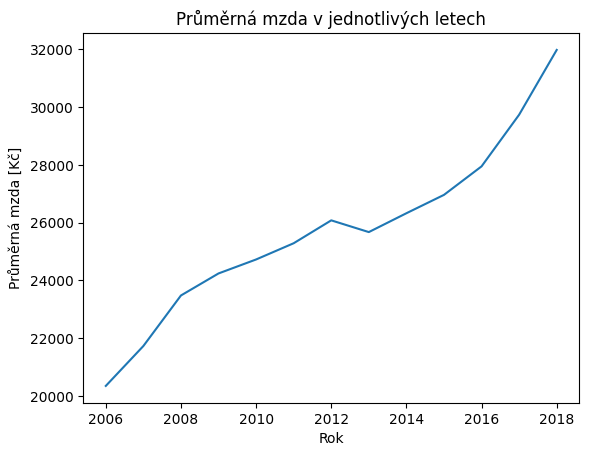

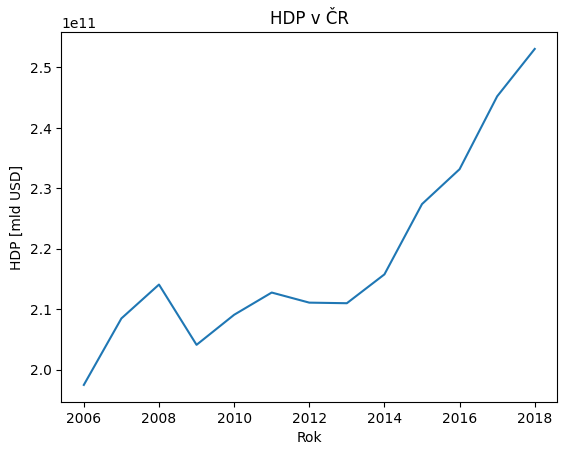

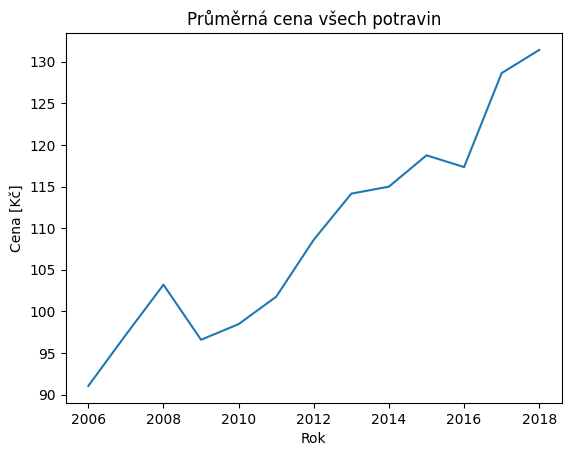

In [12]:
# HDP v ČR
data_HDP = pd.read_csv("Data_HDP_pandas.csv")
data_HDP.index += 1
print(data_HDP)

mzda = data_ceny[["Rok", "Mzda"]]
mzda.index += 1

mzda_rocni_prumery = mzda[~mzda["Rok"].duplicated()]
print(mzda_rocni_prumery)
HDP = list(data_HDP["HDP"])

plt.plot(seznam_roky, mzda_rocni_prumery["Mzda"], label = "Průměrná mzda")
plt.title("Průměrná mzda v jednotlivých letech")
plt.xlabel("Rok")
plt.ylabel("Průměrná mzda [Kč]")
plt.show()

plt.plot(seznam_roky, data_HDP["HDP"], label = "HDP V ČR")
plt.title("HDP v ČR")
plt.xlabel("Rok")
plt.ylabel("HDP [mld USD]")
plt.show()

plt.plot(seznam_roky, prumer_cen_potravin, label = "Průměrná cena všech potravin")
plt.title("Průměrná cena všech potravin")
plt.xlabel("Rok")
plt.ylabel("Cena [Kč]")
plt.show()